# 1.Clustering Algorithm:-
    a.K-means Algorithm:-In this we have only one features (Input)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset
ml=pd.read_csv("mall.csv")
ml.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [3]:
ml.shape

(303, 2)

In [4]:
#check null value
ml.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [5]:
#check dtypes
ml.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [6]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


# Scaling

In [7]:
#Apply Scaling:StandardScaler
from sklearn.preprocessing import StandardScaler

In [8]:
X=ml.columns
print(X)
for col in X:
    #create a object of standardscaler
    ss=StandardScaler()
    ml[col]=ss.fit_transform(ml[[col]])

Index(['INCOME', 'SPEND'], dtype='object')


In [9]:
#checking scaling is apply or not
ml.head()

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939


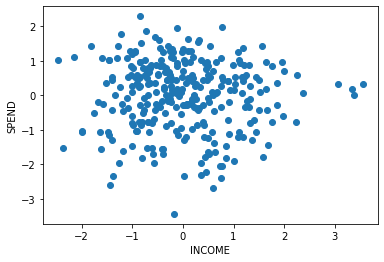

In [10]:
#Visualise dataset use scaterplot
X=ml["INCOME"]
Y=ml["SPEND"]
plt.scatter(X,Y)
plt.xlabel('INCOME')
plt.ylabel('SPEND')
plt.show()

In [11]:
 #how many cluster K in this dataset
# call class Kmeans inbuilt call
from sklearn.cluster import KMeans #Kmeans inbuilt class

# Elbow Method : - use : How many clusters K in this dataset

In [12]:
k_rng=range(1,21) 
#declare empty list 
SSE=[]
#declare empty list for k
k_cluster=[]
for k in k_rng:
    #create object of Kmeans class
    km=KMeans(n_clusters=k) #n_cluster means number of cluster  #FIRST TIME K=1 then K=2
    #we trained the model use fit() method
    km.fit(ml[["INCOME","SPEND"]])
    #inertia_ inbuilt method of KMeans class with calculate the sum of squared error
    #formula of SSE=sum(centrepoint-datapoint)^2
    SSE.append(km.inertia_)
    k_cluster.append(k)

In [13]:
print("sum of squared error :")
print(SSE)
print("value of cluster k :")
print(k_cluster)

sum of squared error :
[605.9999999999998, 401.22497812124897, 253.49782271824623, 199.40902844561683, 155.78714284971002, 131.28486340961044, 114.91078324592787, 101.99150529433898, 90.94501259748598, 81.16561319461738, 73.06149077263235, 66.1046872666576, 62.16986748045588, 57.48197039371059, 52.542839826656575, 48.64912147862989, 45.34591958574845, 42.97658650614691, 39.95216595858912, 38.08522510032773]
value of cluster k :
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


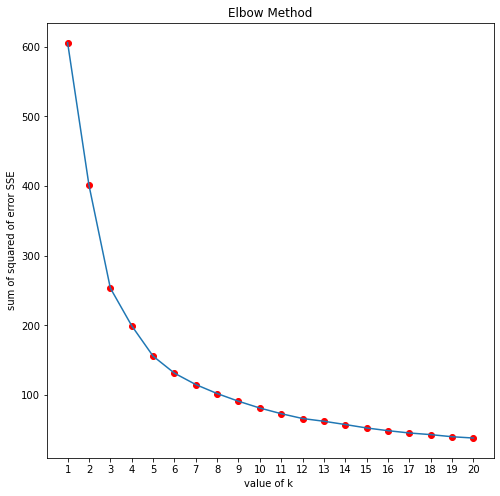

In [14]:
#visulalize SSE and value of k
plt.figure(figsize=(8,8))
plt.scatter(k_rng,SSE,color='red')
plt.plot(k_rng,SSE) #this is use for line to joint datapoints
plt.xticks(k_rng)
plt.xlabel('value of k ')
plt.ylabel('sum of squared of error SSE')
plt.title("Elbow Method")
plt.show()

In [15]:
#clear no.of cluster=5 to see above visualisation in this dataset

In [16]:
km=KMeans(n_clusters=5,random_state=1) #passing the value of k means no.of cluster

In [17]:
Y_pred=km.fit_predict(ml[["INCOME","SPEND"]])

In [18]:
print(Y_pred)

[0 3 3 3 4 1 4 0 3 3 0 0 0 1 0 3 4 1 3 0 0 3 3 0 3 4 3 1 4 3 3 1 3 0 1 3 4
 3 0 4 4 3 0 0 4 4 3 0 1 0 0 4 0 3 3 3 3 3 3 4 2 4 3 1 3 3 0 3 3 3 0 0 3 3
 3 0 0 3 3 0 3 4 4 4 2 0 0 3 3 2 3 3 3 4 1 1 4 0 4 3 3 0 3 3 3 1 1 0 0 0 4
 3 2 3 0 3 3 3 3 0 2 3 0 0 3 3 1 0 3 2 3 0 4 0 4 0 1 1 1 2 4 4 3 0 1 0 0 3
 3 1 0 1 0 0 0 1 3 3 0 3 3 4 3 3 3 2 1 0 0 3 0 3 4 3 1 1 0 4 1 2 4 1 4 3 2
 4 0 2 3 3 4 1 1 0 3 4 0 0 2 0 3 0 2 0 1 0 0 0 1 3 0 0 1 4 0 4 2 4 2 0 4 1
 4 2 1 1 2 1 4 2 0 2 0 2 2 4 4 4 4 0 2 0 1 2 1 0 4 2 3 0 2 0 2 2 2 4 2 1 0
 3 3 0 2 0 1 1 2 1 2 2 0 0 2 0 2 3 1 0 4 1 2 3 1 3 1 2 3 3 4 1 3 4 0 0 1 1
 1 1 2 2 1 1 3]


In [19]:
# Add new column after fit_predict in dataset ml
#ml['New column']=new value
ml["cluster"]=Y_pred
ml.head(10)

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
1,0.097607,1.633471,3
2,-0.852427,0.977514,3
3,-0.191534,1.239897,3
4,2.245510,0.583939,4
5,-1.100262,-0.072018,1
6,1.006335,0.146634,4
7,0.366095,1.021244,0
8,-0.955692,0.540209,3
9,-1.595932,1.064975,3


In [20]:
#craete 5 dataframe accordung to cluster
ml0=ml[ml['cluster']==0]
ml1=ml[ml['cluster']==1]
ml2=ml[ml['cluster']==2]
ml3=ml[ml['cluster']==3]
ml4=ml[ml['cluster']==4]

In [21]:
ml0.head()

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
7,0.366095,1.021244,0
10,-0.129575,0.452748,0
11,0.613930,-0.465593,0
12,0.428054,0.933783,0


In [22]:
ml1.head()

,INCOME,SPEND,cluster
5,-1.100262,-0.072018,1
13,-0.707857,-0.246940,1
17,-0.398063,-1.558855,1
27,-1.451362,-1.165281,1
31,-1.410056,-0.421862,1


In [23]:
#find the centroid value of each cluster,use inbuilt method cluster_centers_
#which is define in Kmeans class
km.cluster_centers_

array([[ 0.10070512,  0.120396  ],
       [-1.01805523, -1.00236328],
       [ 0.66370889, -1.50951841],
       [-0.64637809,  0.96937799],
       [ 1.56528247,  0.36156508]])

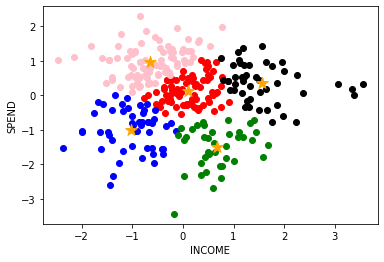

In [24]:
#visualize 
#scatter plot
plt.scatter(ml0["INCOME"],ml0["SPEND"],color="red")
plt.scatter(ml1["INCOME"],ml1["SPEND"],color="blue")
plt.scatter(ml2["INCOME"],ml2["SPEND"],color="green")
plt.scatter(ml3["INCOME"],ml3["SPEND"],color="pink")
plt.scatter(ml4["INCOME"],ml4["SPEND"],color="black")
#show centroid of all datapoint on graph
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="orange",marker="*",s=150)
plt.xlabel("INCOME")
plt.ylabel("SPEND")
plt.show()